# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [14]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [18]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [175]:
# Calcule a média de preço por marca e por veículo
mprice=df.groupby(['vehicleType', 'brand'])['price'].mean()

brands = df['brand'].unique()
types = df['vehicleType'].unique()

df_price = pd.DataFrame(index=brands, columns=types)

for v in mprice.index:
    df_price[ v[0] ][ v[1] ] = int(mprice[ v[0] ][ v[1 ]])
    
df_price.fillna(0, inplace=True)
df_price
#df_price.reset_index()

,Other,coupe,suv,kleinwagen,limousine,cabrio,kombi,bus,andere
volkswagen,897,8014,13946,1626,3743,5784,3902,5881,2597
audi,1012,11242,18644,2582,3829,9655,5442,3485,2685
jeep,960,0,9082,0,0,1350,0,7000,0
skoda,1337,3533,14389,2718,4333,7722,5385,6357,3124
bmw,896,6375,12868,1575,4838,8613,5030,4064,1720
peugeot,985,6488,11945,1740,2927,4528,2970,4534,2805
mazda,791,2905,11683,1521,2686,5421,3388,3517,1607
nissan,772,8244,9073,1525,3120,6067,1827,3882,2327
ford,693,5166,10897,1502,2841,3884,2525,4714,2142
renault,766,5057,9279,1416,2043,4049,2678,2820,2294


,avgPrice,brand,vehicleType
0,897,volkswagen,Other
1,8014,volkswagen,coupe
2,13946,volkswagen,suv
3,1626,volkswagen,kleinwagen
4,3743,volkswagen,limousine


## Preço médio de um veículo por marca, bem como tipo de veículo

Text(165.453125, 0.5, 'Marca')

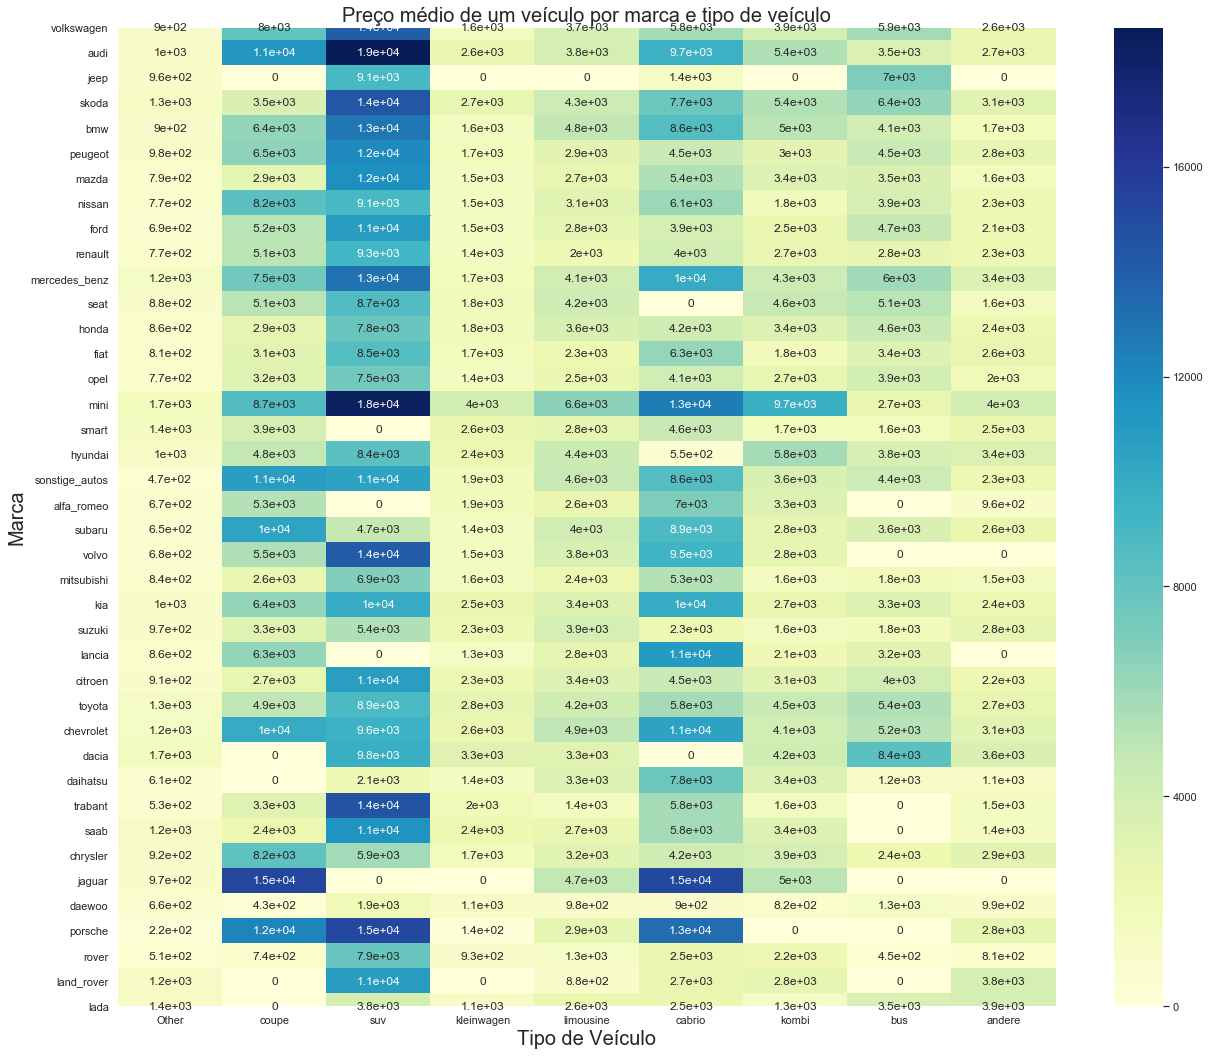

In [176]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
plt.figure(figsize=(21, 18))
ax = sns.heatmap(df_price, cmap='YlGnBu', annot=True)
ax.set_title("Preço médio de um veículo por marca e tipo de veículo", fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})

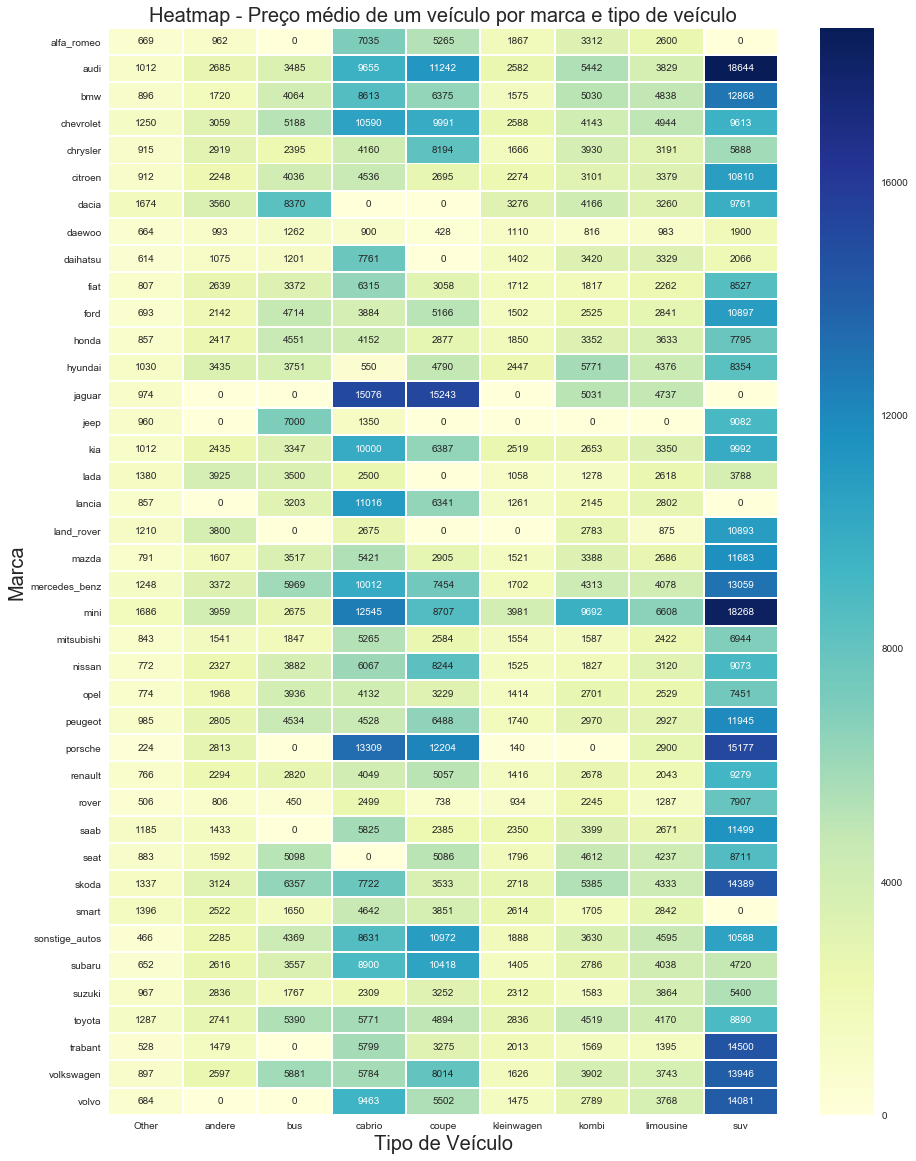

In [174]:
# Salvando o plot
fig = ax.get_figure()
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>